In [1]:
%load_ext autoreload
%autoreload 2
%load_ext lab_black

import numpy as np
import dapgen
import pandas as pd
import dask.array as da
import itertools
import submitit
import json
import matplotlib.pyplot as plt
import admix_genet_cor
from admix_genet_cor import calc_snp_prior_var
import pandas as pd
import admix
from os.path import join
import os

In [8]:
DATA_ROOT_DIR = (
    "/u/project/pasaniuc/pasaniucdata/admixture/projects/PAGE-QC/01_dataset/out/aframr"
)
SAMPLE_INFO_PATH = join(DATA_ROOT_DIR, "sample_info.txt")

In [26]:
dset = admix.io.read_dataset(
    f"{DATA_ROOT_DIR}/hm3/chr1",
    indiv_info_file=SAMPLE_INFO_PATH,
    n_anc=2,
)

2021-12-20 16:29.23 [info     ] admix.Dataset: read local ancestry from /u/project/pasaniuc/pasaniucdata/admixture/projects/PAGE-QC/01_dataset/out/aframr/hm3/chr1.lanc


In [38]:
from tqdm import tqdm

In [39]:
avg_lanc = None
for chrom in tqdm(range(1, 23)):
    dset = admix.io.read_dataset(
        f"{DATA_ROOT_DIR}/hm3/chr{chrom}",
        n_anc=2,
    )
    if avg_lanc is None:
        avg_lanc = dset.lanc.sum(axis=[0, 2]).compute()
    else:
        avg_lanc += dset.lanc.sum(axis=[0, 2]).compute()

  0%|          | 0/22 [00:00<?, ?it/s]

2021-12-20 16:33.48 [info     ] admix.Dataset: read local ancestry from /u/project/pasaniuc/pasaniucdata/admixture/projects/PAGE-QC/01_dataset/out/aframr/hm3/chr1.lanc


  5%|▍         | 1/22 [01:06<23:09, 66.18s/it]

2021-12-20 16:34.54 [info     ] admix.Dataset: read local ancestry from /u/project/pasaniuc/pasaniucdata/admixture/projects/PAGE-QC/01_dataset/out/aframr/hm3/chr2.lanc


  9%|▉         | 2/22 [02:07<21:06, 63.32s/it]

2021-12-20 16:35.55 [info     ] admix.Dataset: read local ancestry from /u/project/pasaniuc/pasaniucdata/admixture/projects/PAGE-QC/01_dataset/out/aframr/hm3/chr3.lanc


 14%|█▎        | 3/22 [03:00<18:35, 58.71s/it]

2021-12-20 16:36.49 [info     ] admix.Dataset: read local ancestry from /u/project/pasaniuc/pasaniucdata/admixture/projects/PAGE-QC/01_dataset/out/aframr/hm3/chr4.lanc


 18%|█▊        | 4/22 [03:43<15:44, 52.46s/it]

2021-12-20 16:37.32 [info     ] admix.Dataset: read local ancestry from /u/project/pasaniuc/pasaniucdata/admixture/projects/PAGE-QC/01_dataset/out/aframr/hm3/chr5.lanc


 23%|██▎       | 5/22 [04:28<14:05, 49.75s/it]

2021-12-20 16:38.17 [info     ] admix.Dataset: read local ancestry from /u/project/pasaniuc/pasaniucdata/admixture/projects/PAGE-QC/01_dataset/out/aframr/hm3/chr6.lanc


 27%|██▋       | 6/22 [05:16<13:05, 49.12s/it]

2021-12-20 16:39.04 [info     ] admix.Dataset: read local ancestry from /u/project/pasaniuc/pasaniucdata/admixture/projects/PAGE-QC/01_dataset/out/aframr/hm3/chr7.lanc


 32%|███▏      | 7/22 [05:59<11:47, 47.18s/it]

2021-12-20 16:39.48 [info     ] admix.Dataset: read local ancestry from /u/project/pasaniuc/pasaniucdata/admixture/projects/PAGE-QC/01_dataset/out/aframr/hm3/chr8.lanc


 36%|███▋      | 8/22 [06:43<10:45, 46.08s/it]

2021-12-20 16:40.32 [info     ] admix.Dataset: read local ancestry from /u/project/pasaniuc/pasaniucdata/admixture/projects/PAGE-QC/01_dataset/out/aframr/hm3/chr9.lanc


 41%|████      | 9/22 [07:14<09:00, 41.56s/it]

2021-12-20 16:41.03 [info     ] admix.Dataset: read local ancestry from /u/project/pasaniuc/pasaniucdata/admixture/projects/PAGE-QC/01_dataset/out/aframr/hm3/chr10.lanc


 45%|████▌     | 10/22 [07:50<07:55, 39.60s/it]

2021-12-20 16:41.38 [info     ] admix.Dataset: read local ancestry from /u/project/pasaniuc/pasaniucdata/admixture/projects/PAGE-QC/01_dataset/out/aframr/hm3/chr11.lanc


 50%|█████     | 11/22 [08:22<06:49, 37.23s/it]

2021-12-20 16:42.10 [info     ] admix.Dataset: read local ancestry from /u/project/pasaniuc/pasaniucdata/admixture/projects/PAGE-QC/01_dataset/out/aframr/hm3/chr12.lanc


 55%|█████▍    | 12/22 [08:57<06:06, 36.66s/it]

2021-12-20 16:42.45 [info     ] admix.Dataset: read local ancestry from /u/project/pasaniuc/pasaniucdata/admixture/projects/PAGE-QC/01_dataset/out/aframr/hm3/chr13.lanc


 59%|█████▉    | 13/22 [09:25<05:06, 34.09s/it]

2021-12-20 16:43.13 [info     ] admix.Dataset: read local ancestry from /u/project/pasaniuc/pasaniucdata/admixture/projects/PAGE-QC/01_dataset/out/aframr/hm3/chr14.lanc


 64%|██████▎   | 14/22 [09:53<04:16, 32.12s/it]

2021-12-20 16:43.41 [info     ] admix.Dataset: read local ancestry from /u/project/pasaniuc/pasaniucdata/admixture/projects/PAGE-QC/01_dataset/out/aframr/hm3/chr15.lanc


 68%|██████▊   | 15/22 [10:13<03:20, 28.66s/it]

2021-12-20 16:44.02 [info     ] admix.Dataset: read local ancestry from /u/project/pasaniuc/pasaniucdata/admixture/projects/PAGE-QC/01_dataset/out/aframr/hm3/chr16.lanc


 73%|███████▎  | 16/22 [10:35<02:39, 26.54s/it]

2021-12-20 16:44.23 [info     ] admix.Dataset: read local ancestry from /u/project/pasaniuc/pasaniucdata/admixture/projects/PAGE-QC/01_dataset/out/aframr/hm3/chr17.lanc


 77%|███████▋  | 17/22 [10:53<02:00, 24.15s/it]

2021-12-20 16:44.42 [info     ] admix.Dataset: read local ancestry from /u/project/pasaniuc/pasaniucdata/admixture/projects/PAGE-QC/01_dataset/out/aframr/hm3/chr18.lanc


 82%|████████▏ | 18/22 [11:17<01:35, 23.98s/it]

2021-12-20 16:45.05 [info     ] admix.Dataset: read local ancestry from /u/project/pasaniuc/pasaniucdata/admixture/projects/PAGE-QC/01_dataset/out/aframr/hm3/chr19.lanc


 86%|████████▋ | 19/22 [11:32<01:03, 21.20s/it]

2021-12-20 16:45.20 [info     ] admix.Dataset: read local ancestry from /u/project/pasaniuc/pasaniucdata/admixture/projects/PAGE-QC/01_dataset/out/aframr/hm3/chr20.lanc


 91%|█████████ | 20/22 [11:52<00:41, 21.00s/it]

2021-12-20 16:45.41 [info     ] admix.Dataset: read local ancestry from /u/project/pasaniuc/pasaniucdata/admixture/projects/PAGE-QC/01_dataset/out/aframr/hm3/chr21.lanc


 95%|█████████▌| 21/22 [12:04<00:18, 18.34s/it]

2021-12-20 16:45.53 [info     ] admix.Dataset: read local ancestry from /u/project/pasaniuc/pasaniucdata/admixture/projects/PAGE-QC/01_dataset/out/aframr/hm3/chr22.lanc


100%|██████████| 22/22 [12:15<00:00, 33.45s/it]


In [41]:
dset = admix.io.read_dataset(
    f"{DATA_ROOT_DIR}/hm3/chr1",
    indiv_info_file=SAMPLE_INFO_PATH,
    n_anc=2,
)

2021-12-20 16:46.42 [info     ] admix.Dataset: read local ancestry from /u/project/pasaniuc/pasaniucdata/admixture/projects/PAGE-QC/01_dataset/out/aframr/hm3/chr1.lanc


In [45]:
import scipy

In [46]:
scipy.stats.pearsonr(avg_lanc, dset.indiv["geno_EV1"])

(0.9977025543376206, 0.0)

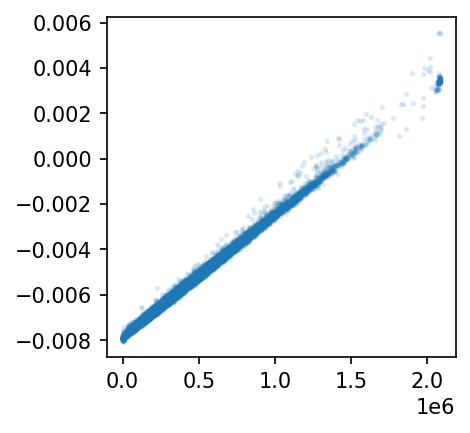

In [49]:
fig, ax = plt.subplots(figsize=(3, 3), dpi=150)
ax.scatter(avg_lanc, dset.indiv["geno_EV1"], s=3, alpha=0.1)